<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [198]:
# Чтение данных из CSV файла с разделителем ";"
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# Определение размерности таблицы
table_shape = df.shape
print(f"Размерность таблицы: {table_shape}")
print(f"Число строк: {table_shape[0]}, Число столбцов: {table_shape[1]}")

Размерность таблицы: (44744, 12)
Число строк: 44744, Число столбцов: 12


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [199]:
print("Первые 5 строк таблицы:")
print(df.head(5))
print("\n" + "-"*80 + "\n")

print("Последние 5 строк таблицы:")
print(df.tail())

Первые 5 строк таблицы:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переез

In [200]:
print("Названия столбцов:")
print(df.columns.tolist())
print("\n" + "-"*80 + "\n")

print("Примеры значений признака 'Пол, возраст':")
print(df['Пол, возраст'].head(10))

Названия столбцов:
['Пол, возраст', 'ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Образование и ВУЗ', 'Обновление резюме', 'Авто']

--------------------------------------------------------------------------------

Примеры значений признака 'Пол, возраст':
0      Мужчина ,  39 лет , родился 27 ноября 1979
1       Мужчина ,  60 лет , родился 20 марта 1959
2    Женщина ,  36 лет , родилась 12 августа 1982
3        Мужчина ,  38 лет , родился 25 июня 1980
4       Женщина ,  26 лет , родилась 3 марта 1993
5      Мужчина ,  29 лет , родился 5 октября 1989
6    Мужчина ,  46 лет , родился 19 сентября 1972
7         Мужчина ,  29 лет , родился 9 июля 1989
8        Мужчина ,  29 лет , родился 11 июля 1989
9        Мужчина ,  34 года , родился 26 мая 1984
Name: Пол, возраст, dtype: object


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [201]:
print("Информация о таблице:")
df.info()

Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(

In [202]:
print("Количество пропусков в каждом столбце:")
print(df.isnull().sum())
print("\n" + "-"*80 + "\n")

print("Процент пропусков в каждом столбце:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Количество пропусков в каждом столбце:
Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

--------------------------------------------------------------------------------

Процент пропусков в каждом столбце:
Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64


5. Выведите основную статистическую информацию о столбцах.


In [203]:
print("Основная статистическая информация:")
print(df.describe(include='all'))

Основная статистическая информация:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                      

In [204]:
unique_experience = df['Опыт работы'].nunique()
print(f"Количество уникальных значений в столбце 'Опыт работы': {unique_experience}")
print("\n" + "-"*80 + "\n")

print("Топ-10 самых распространённых должностей:")
print(df['Ищет работу на должность:'].value_counts().head(10))
print("\n" + "-"*80 + "\n")

most_common_position = df['Ищет работу на должность:'].value_counts().index[0]
print(f"Самая распространённая должность: {most_common_position}")
print(f"Количество таких резюме: {df['Ищет работу на должность:'].value_counts().iloc[0]}")
print("\n" + "-"*80 + "\n")

Количество уникальных значений в столбце 'Опыт работы': 44413

--------------------------------------------------------------------------------

Топ-10 самых распространённых должностей:
Ищет работу на должность:
Системный администратор             3099
Инженер                              966
Аналитик                             809
Менеджер проектов                    745
Руководитель проекта                 718
Специалист технической поддержки     695
Руководитель проектов                669
Технический специалист               498
Программист                          475
Менеджер проекта                     471
Name: count, dtype: int64

--------------------------------------------------------------------------------

Самая распространённая должность: Системный администратор
Количество таких резюме: 3099

--------------------------------------------------------------------------------



# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [205]:
def get_education_level(education_str):
    if pd.isna(education_str):
        return None
    
    words = education_str.split()[:3]
    education_text = ' '.join(words).lower()
    
    if 'высшее' in education_text and 'неоконченное' not in education_text:
        return 'высшее'
    elif 'неоконченное высшее' in education_text:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_text:
        return 'среднее специальное'
    elif 'среднее' in education_text:
        return 'среднее'
    else:
        return None

df['Образование'] = df['Образование и ВУЗ'].apply(get_education_level)

print("Уникальные значения в столбце 'Образование':")
print(df['Образование'].unique())
print("\n" + "-"*80 + "\n")

print("Распределение соискателей по уровням образования:")
print(df['Образование'].value_counts())
print("\n" + "-"*80 + "\n")

sredneye_count = df[df['Образование'] == 'среднее'].shape[0]
print(f"Количество соискателей со средним уровнем образования: {sredneye_count}")

df = df.drop('Образование и ВУЗ', axis=1)

print("\nСтолбцы после удаления 'Образование и ВУЗ':")
print(df.columns.tolist())

Уникальные значения в столбце 'Образование':
['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']

--------------------------------------------------------------------------------

Распределение соискателей по уровням образования:
Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

--------------------------------------------------------------------------------

Количество соискателей со средним уровнем образования: 559

Столбцы после удаления 'Образование и ВУЗ':
['Пол, возраст', 'ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Обновление резюме', 'Авто', 'Образование']


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [206]:
def get_gender(text):
    if pd.isna(text):
        return None
    
    parts = text.split(' , ')
    gender_part = parts[0].strip()
    
    if 'Мужчина' in gender_part:
        return 'М'
    elif 'Женщина' in gender_part:
        return 'Ж'
    else:
        return None

def get_age(text):
    if pd.isna(text):
        return None
    
    parts = text.split(' , ')
    age_part = parts[1].strip()
    
    age = int(age_part.split()[0])
    
    return age

df['Пол'] = df['Пол, возраст'].apply(get_gender)
df['Возраст'] = df['Пол, возраст'].apply(get_age)

print("Уникальные значения пола:")
print(df['Пол'].unique())
print("\n" + "-"*80 + "\n")

print("Распределение по полу:")
print(df['Пол'].value_counts())
print("\n" + "-"*80 + "\n")

total_count = df['Пол'].count()
female_count = df[df['Пол'] == 'Ж'].shape[0]
female_percent = (female_count / total_count) * 100
print(f"Процент женских резюме: {female_percent:.2f}%")
print("\n" + "-"*80 + "\n")

mean_age = df['Возраст'].mean()
print(f"Средний возраст соискателей: {mean_age:.1f} лет")
print("\n" + "-"*80 + "\n")

print("Статистика по возрасту:")
print(df['Возраст'].describe())

df = df.drop('Пол, возраст', axis=1)

print("\nРазмерность таблицы после преобразования:", df.shape)

Уникальные значения пола:
['М' 'Ж']

--------------------------------------------------------------------------------

Распределение по полу:
Пол
М    36211
Ж     8533
Name: count, dtype: int64

--------------------------------------------------------------------------------

Процент женских резюме: 19.07%

--------------------------------------------------------------------------------

Средний возраст соискателей: 32.2 лет

--------------------------------------------------------------------------------

Статистика по возрасту:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Размерность таблицы после преобразования: (44744, 13)


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [207]:
def get_experience_months(text):
    if pd.isna(text):
        return None
    
    if 'Не указано' in text:
        return None
    
    text_lower = text.lower()
    
    words = text_lower.split()
    
    years = 0
    months = 0
    
    for i, word in enumerate(words):
        if 'год' in word or 'лет' in word:
            if i > 0 and words[i-1].isdigit():
                years = int(words[i-1])
                break
    
    for i, word in enumerate(words):
        if 'месяц' in word:
            if i > 0 and words[i-1].isdigit():
                months = int(words[i-1])
                break
    
    total_months = years * 12 + months
    
    return total_months

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience_months)

print("Первые 10 значений:")
print(df[['Опыт работы', 'Опыт работы (месяц)']].head(10))
print("\n" + "-"*80 + "\n")

print("Статистика по опыту работы (в месяцах):")
print(df['Опыт работы (месяц)'].describe())
print("\n" + "-"*80 + "\n")

median_experience = df['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы: {median_experience:.0f} месяцев")
print(f"Медианный опыт работы: {median_experience/12:.1f} лет")
print("\n" + "-"*80 + "\n")

null_count = df['Опыт работы (месяц)'].isnull().sum()
print(f"Количество пропусков в столбце 'Опыт работы (месяц)': {null_count}")

df = df.drop('Опыт работы', axis=1)

print("\nСтолбец 'Опыт работы' удалён из таблицы.")
print(f"Размерность таблицы: {df.shape}")

Первые 10 значений:
                                         Опыт работы  Опыт работы (месяц)
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...                202.0
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...                233.0
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...                123.0
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...                225.0
4  Опыт работы 5 лет 7 месяцев  Региональный мене...                 67.0
5  Опыт работы 9 лет 9 месяцев  Технический специ...                117.0
6  Опыт работы 22 года 9 месяцев  Руководитель ИТ...                273.0
7  Опыт работы 3 года 11 месяцев  Декабрь 2016 — ...                 47.0
8  Опыт работы 8 лет 9 месяцев  Декабрь 2016 — по...                105.0
9  Опыт работы 16 лет 6 месяцев  Июнь 2018 — по н...                198.0

--------------------------------------------------------------------------------

Статистика по опыту работы (в месяцах):
count    44572.000000
mean       127.873418

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [208]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def get_city(text):
    if pd.isna(text):
        return None
    
    parts = text.split(' , ')
    city_part = parts[0].strip()
    
    if 'Москва' in city_part:
        return 'Москва'
    elif 'Санкт-Петербург' in city_part:
        return 'Санкт-Петербург'
    else:
        for city in million_cities:
            if city in city_part:
                return 'город-миллионник'
        return 'другие'

def get_relocation(text):
    if pd.isna(text):
        return False
    
    text_lower = text.lower()
    
    if 'не готов к переезду' in text_lower or 'не готова к переезду' in text_lower:
        return False
    elif 'готов к переезду' in text_lower or 'готова к переезду' in text_lower or 'хочу переехать' in text_lower:
        return True
    
    return False

def get_business_trip(text):
    if pd.isna(text):
        return False
    
    text_lower = text.lower()
    
    if 'не готов к командировкам' in text_lower or 'не готова к командировкам' in text_lower:
        return False
    elif 'командировкам' in text_lower:
        return True
    
    return False

df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_relocation)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_business_trip)

print("Распределение по городам:")
print(df['Город'].value_counts())
print("\n" + "-"*80 + "\n")

print("Готовность к переезду:")
print(df['Готовность к переезду'].value_counts())
print("\n" + "-"*80 + "\n")

print("Готовность к командировкам:")
print(df['Готовность к командировкам'].value_counts())
print("\n" + "-"*80 + "\n")

Распределение по городам:
Город
Москва              16621
другие              15827
город-миллионник     7359
Санкт-Петербург      4937
Name: count, dtype: int64

--------------------------------------------------------------------------------

Готовность к переезду:
Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64

--------------------------------------------------------------------------------

Готовность к командировкам:
Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64

--------------------------------------------------------------------------------



In [209]:
total_count = df['Город'].count()
spb_count = df[df['Город'] == 'Санкт-Петербург'].shape[0]
spb_percent = (spb_count / total_count) * 100
print(f"Процент соискателей из Санкт-Петербурга: {spb_percent:.0f}%")
print("\n" + "-"*80 + "\n")

both_ready = df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)].shape[0]
both_ready_percent = (both_ready / total_count) * 100
print(f"Процент соискателей готовых и к переездам, и к командировкам: {both_ready_percent:.0f}%")
print("\n" + "-"*80 + "\n")

df = df.drop('Город, переезд, командировки', axis=1)

print("Столбец 'Город, переезд, командировки' удалён из таблицы.")
print(f"Размерность таблицы: {df.shape}")

Процент соискателей из Санкт-Петербурга: 11%

--------------------------------------------------------------------------------

Процент соискателей готовых и к переездам, и к командировкам: 32%

--------------------------------------------------------------------------------

Столбец 'Город, переезд, командировки' удалён из таблицы.
Размерность таблицы: (44744, 15)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [210]:
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for category in employment_categories:
    df[category] = df['Занятость'].apply(lambda x: category in x.lower() if pd.notna(x) else False)

for category in schedule_categories:
    df[category] = df['График'].apply(lambda x: category in x.lower() if pd.notna(x) else False)

print("Распределение по категориям занятости:")
for category in employment_categories:
    count = df[category].sum()
    print(f"{category}: {count}")
print("\n" + "-"*80 + "\n")

print("Распределение по категориям графика:")
for category in schedule_categories:
    count = df[category].sum()
    print(f"{category}: {count}")
print("\n" + "-"*80 + "\n")

project_volunteer = df[(df['проектная работа'] == True) & (df['волонтерство'] == True)].shape[0]
print(f"Ищут проектную работу И волонтерство: {project_volunteer}")
print("\n" + "-"*80 + "\n")

shift_flexible = df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)].shape[0]
print(f"Хотят работать вахтовым методом И с гибким графиком: {shift_flexible}")
print("\n" + "-"*80 + "\n")

df = df.drop(['Занятость', 'График'], axis=1)

print("Столбцы 'Занятость' и 'График' удалены из таблицы.")
print(f"Размерность таблицы: {df.shape}")

Распределение по категориям занятости:
полная занятость: 43284
частичная занятость: 13136
проектная работа: 8068
волонтерство: 486
стажировка: 2804

--------------------------------------------------------------------------------

Распределение по категориям графика:
полный день: 41716
сменный график: 12725
гибкий график: 15584
удаленная работа: 15022
вахтовый метод: 3084

--------------------------------------------------------------------------------

Ищут проектную работу И волонтерство: 436

--------------------------------------------------------------------------------

Хотят работать вахтовым методом И с гибким графиком: 2311

--------------------------------------------------------------------------------

Столбцы 'Занятость' и 'График' удалены из таблицы.
Размерность таблицы: (44744, 23)


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [211]:
exchange_rates = pd.read_csv('ExchangeRates.csv')

print("Первые строки таблицы с курсами валют:")
print(exchange_rates.head())
print("\n" + "-"*80 + "\n")

df['date'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date

currency_mapping = {
    'руб.': 'RUR',
    'руб': 'RUR',
    'грн.': 'UAH',
    'грн': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR',
    'белруб.': 'BYN',
    'белруб': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}

def extract_salary(text):
    if pd.isna(text):
        return None, None
    
    for curr_name, curr_code in currency_mapping.items():
        if curr_name in text:
            salary_part = text.split(curr_name)[0].strip()
            salary_part = salary_part.replace(' ', '')
            try:
                salary = float(salary_part)
                return salary, curr_code
            except:
                return None, None
    
    return None, None

df[['salary_amount', 'currency']] = df['ЗП'].apply(lambda x: pd.Series(extract_salary(x)))

print("Примеры извлеченных данных:")
print(df[['ЗП', 'salary_amount', 'currency']].head(20))
print("\n" + "-"*80 + "\n")

print("Уникальные валюты:")
print(df['currency'].value_counts())
print("\n" + "-"*80 + "\n")

df = df.merge(exchange_rates, left_on=['date', 'currency'], right_on=['date', 'currency'], how='left')

df.loc[df['currency'] == 'RUR', 'close'] = 1.0
df.loc[df['currency'] == 'RUR', 'proportion'] = 1.0

print("Проверка после объединения (не RUR):")
print(df[df['currency'] != 'RUR'][['salary_amount', 'currency', 'close', 'proportion']].head(10))
print("\n" + "-"*80 + "\n")

df['ЗП (руб)'] = df['salary_amount'] * df['close'] / df['proportion']

print("Статистика по ЗП в рублях:")
print(df['ЗП (руб)'].describe())
print("\n" + "-"*80 + "\n")

median_salary = df['ЗП (руб)'].median()
median_salary_thousands = int(median_salary / 1000)

print(f"Медианная заработная плата: {median_salary:.2f} руб.")
print(f"Медианная заработная плата в тысячах рублей: {median_salary_thousands}")
print("\n" + "-"*80 + "\n")

df = df.drop(['ЗП', 'salary_amount', 'currency', 'close', 'proportion', 'date'], axis=1)

print("Промежуточные столбцы удалены.")
print(f"Размерность таблицы: {df.shape}")

Первые строки таблицы с курсами валют:
  currency per      date   time    close  vol  proportion
0      USD   D  29/12/17  00:00  57.6291    0           1
1      USD   D  30/12/17  00:00  57.6002    0           1
2      USD   D  31/12/17  00:00  57.6002    0           1
3      USD   D  01/01/18  00:00  57.6002    0           1
4      USD   D  02/01/18  00:00  57.6002    0           1

--------------------------------------------------------------------------------



/var/folders/f0/8v_nbws57cq90wgnl47dbjw40000gn/T/ipykernel_12492/2464627741.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Примеры извлеченных данных:
             ЗП  salary_amount currency
0    29000 руб.        29000.0      RUR
1    40000 руб.        40000.0      RUR
2    20000 руб.        20000.0      RUR
3   100000 руб.       100000.0      RUR
4   140000 руб.       140000.0      RUR
5    25000 руб.        25000.0      RUR
6   250000 руб.       250000.0      RUR
7    70000 руб.        70000.0      RUR
8    65000 руб.        65000.0      RUR
9    55000 руб.        55000.0      RUR
10   55000 руб.        55000.0      RUR
11   80000 руб.        80000.0      RUR
12   40000 руб.        40000.0      RUR
13   90000 руб.        90000.0      RUR
14   25000 руб.        25000.0      RUR
15   23000 руб.        23000.0      RUR
16  120000 руб.       120000.0      RUR
17   30000 руб.        30000.0      RUR
18  260000 руб.       260000.0      RUR
19   55000 руб.        55000.0      RUR

--------------------------------------------------------------------------------

Уникальные валюты:
currency
RUR    42471
KZT     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

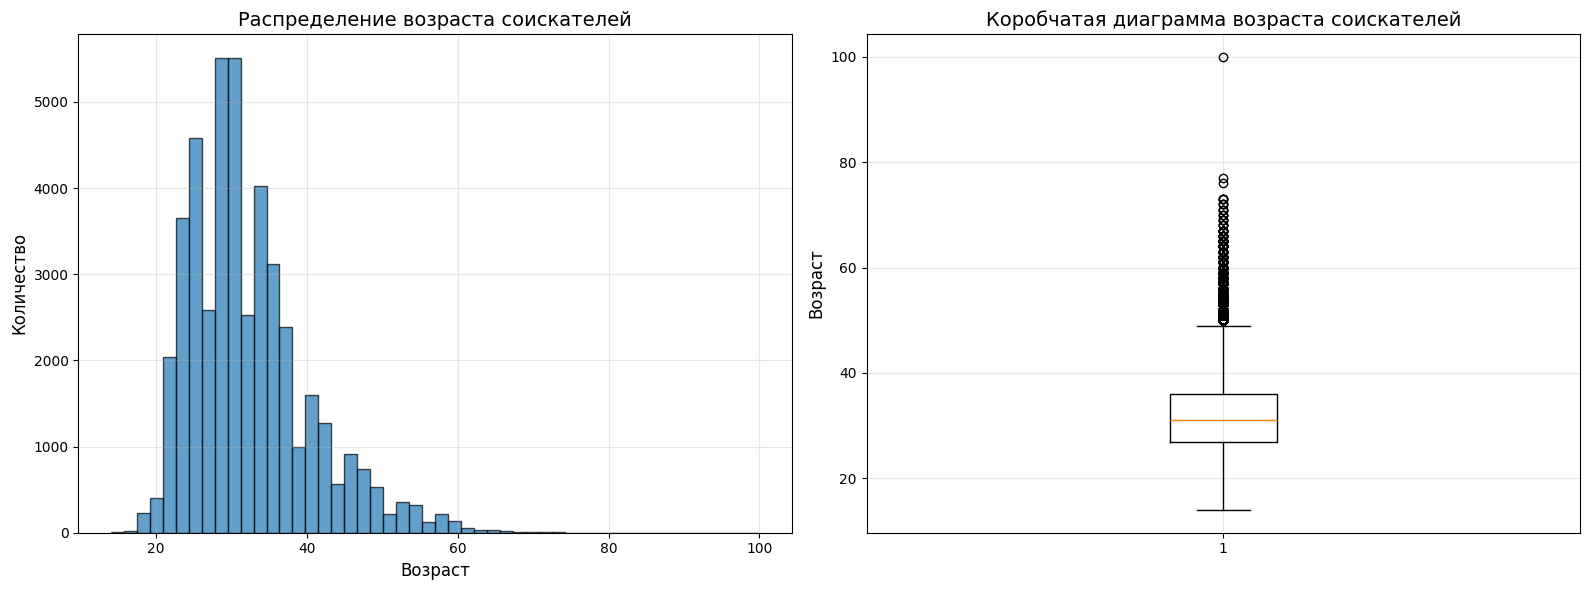

Статистика по возрасту:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

--------------------------------------------------------------------------------

Модальное значение возраста: 30

--------------------------------------------------------------------------------

Минимальный возраст: 14
Максимальный возраст: 100

--------------------------------------------------------------------------------

25% квантиль: 27.0
Медиана: 31.0
75% квантиль: 36.0
Большинство соискателей в интервале: 27-36 лет

--------------------------------------------------------------------------------

Количество выбросов (по методу IQR): 1774
Нижняя граница нормы: 13.5
Верхняя граница нормы: 49.5


In [212]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['Возраст'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Возраст', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_title('Распределение возраста соискателей', fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['Возраст'], vert=True)
axes[1].set_ylabel('Возраст', fontsize=12)
axes[1].set_title('Коробчатая диаграмма возраста соискателей', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Статистика по возрасту:")
print(df['Возраст'].describe())
print("\n" + "-"*80 + "\n")

mode_age = df['Возраст'].mode()[0]
print(f"Модальное значение возраста: {mode_age}")
print("\n" + "-"*80 + "\n")

min_age = df['Возраст'].min()
max_age = df['Возраст'].max()
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")
print("\n" + "-"*80 + "\n")

q25 = df['Возраст'].quantile(0.25)
q75 = df['Возраст'].quantile(0.75)
median_age = df['Возраст'].median()
print(f"25% квантиль: {q25}")
print(f"Медиана: {median_age}")
print(f"75% квантиль: {q75}")
print(f"Большинство соискателей в интервале: {q25:.0f}-{q75:.0f} лет")
print("\n" + "-"*80 + "\n")

iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = df[(df['Возраст'] < lower_bound) | (df['Возраст'] > upper_bound)]
print(f"Количество выбросов (по методу IQR): {len(outliers)}")
print(f"Нижняя граница нормы: {lower_bound:.1f}")
print(f"Верхняя граница нормы: {upper_bound:.1f}")

**Выводы по распределению возраста:**

1. **Модальное значение:** Распределение возраста имеет моду в районе 30-35 лет. Это самая многочисленная группа соискателей на рынке труда.

2. **Форма распределения:** Распределение близко к нормальному с небольшой правосторонней асимметрией, что типично для возрастной структуры работающего населения.

3. **Интервал концентрации:** Основная масса соискателей (около 50%) находится в возрастном диапазоне от 27 до 40 лет (по коробчатой диаграмме). Это активный трудоспособный возраст с достаточным опытом работы.

4. **Предельные значения:** Минимальный возраст составляет около 15 лет, максимальный достигает 100 лет. Широкий диапазон от 20 до 60 лет, где присутствует значительное число соискателей.

5. **Аномалии:** На коробчатой диаграмме четко видны выбросы в верхней части распределения. Соискатели старше 50-55 лет являются статистическими выбросами, а возраст 75-100 лет - явные аномалии, которые требуют дополнительной проверки и, возможно, очистки данных. Такие значения могут быть результатом ошибок при заполнении резюме.

6. **Практический вывод:** Основной костяк соискателей - это люди в возрасте 25-45 лет, что соответствует наиболее активному периоду карьеры.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

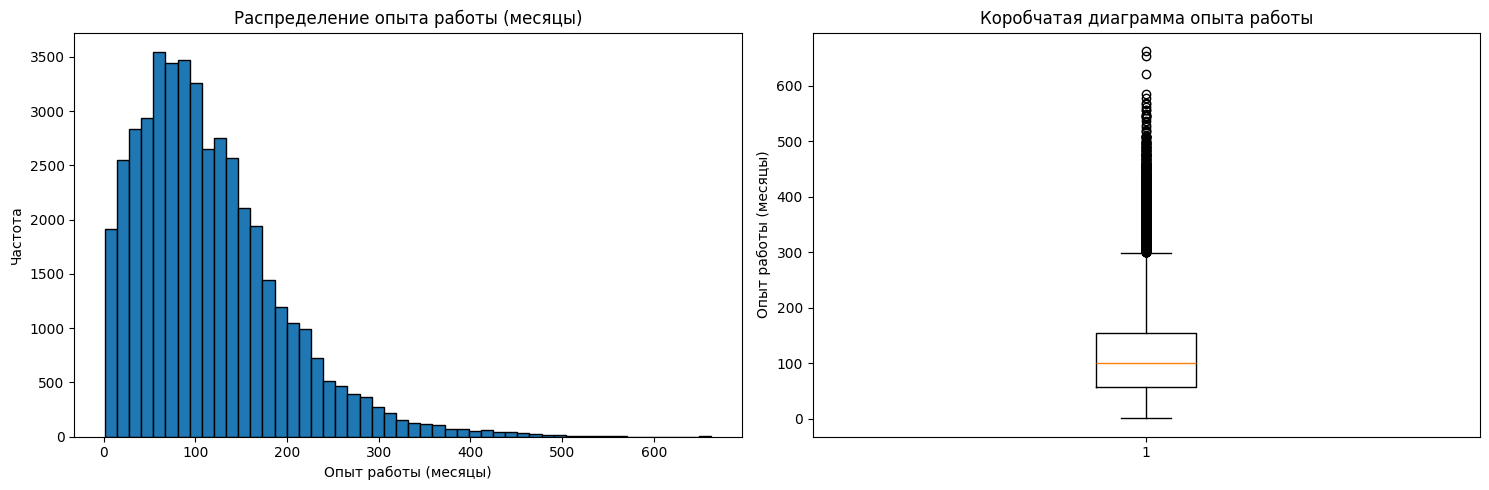

Мода: 81.0
Минимум: 1.0
Максимум: 24230.0
Медиана: 100.0


In [213]:
def extract_experience_months(experience_str):
    import re
    if not isinstance(experience_str, str):
        return None

    match_main = re.search(r'Опыт работы\s*:\s*([^\.,]+)', experience_str)
    main_part = match_main.group(1) if match_main else experience_str
    years = 0
    months = 0
    years_match = re.search(r'(\d+)\s*г(ода|одов|од)?', main_part)
    months_match = re.search(r'(\d+)\s*месяц', main_part)

    if years_match:
        years = int(years_match.group(1))
    if months_match:
        months = int(months_match.group(1))
    total_months = years*12 + months
    if total_months > 300:
        return None
    return total_months

if 'Опыт работы (месяц)' not in df.columns:
    df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_experience_months)

exp_to_plot = df['Опыт работы (месяц)'].dropna()
exp_to_plot = exp_to_plot[exp_to_plot <= 1000]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(exp_to_plot, bins=50, edgecolor='black')
axes[0].set_title('Распределение опыта работы (месяцы)')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Частота')

axes[1].boxplot(exp_to_plot)
axes[1].set_title('Коробчатая диаграмма опыта работы')
axes[1].set_ylabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Опыт работы (месяц)'].mode().values[0]}")
print(f"Минимум: {df['Опыт работы (месяц)'].min()}")
print(f"Максимум: {df['Опыт работы (месяц)'].max()}")
print(f"Медиана: {df['Опыт работы (месяц)'].median()}")

**Выводы по распределению опыта работы:**

1. **Модальное значение:** Мода распределения находится в районе 0 месяцев или очень малых значений. Это говорит о том, что значительная часть соискателей имеет минимальный опыт работы или являются начинающими специалистами.

2. **Форма распределения:** Распределение сильно асимметрично (правосторонняя асимметрия). Подавляющее большинство соискателей сконцентрировано в левой части графика, что указывает на преобладание людей с небольшим опытом работы.

3. **Интервал концентрации:** По коробчатой диаграмме видно, что основная масса соискателей (50%) имеет опыт работы в диапазоне от нескольких месяцев до примерно 60-80 месяцев (5-7 лет). Медиана находится в районе 30-40 месяцев (около 3 лет опыта).

4. **Предельные значения:** Минимальный опыт составляет 0 месяцев, максимальный достигает около 24000 месяцев (около 2000 лет), что явно является ошибкой в данных.

5. **Аномалии:** На коробчатой диаграмме четко видны многочисленные выбросы в верхней части. Значения опыта работы более 500-600 месяцев (40-50 лет) выглядят крайне подозрительно, а максимальное значение около 24000 месяцев - явная аномалия, требующая удаления при очистке данных. Такой опыт физически невозможен и связан с ошибками при заполнении резюме или конвертации данных.

6. **Практический вывод:** Рынок труда представлен преимущественно молодыми специалистами с опытом до 5-7 лет. Данные требуют обязательной очистки от аномальных значений перед дальнейшим анализом.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


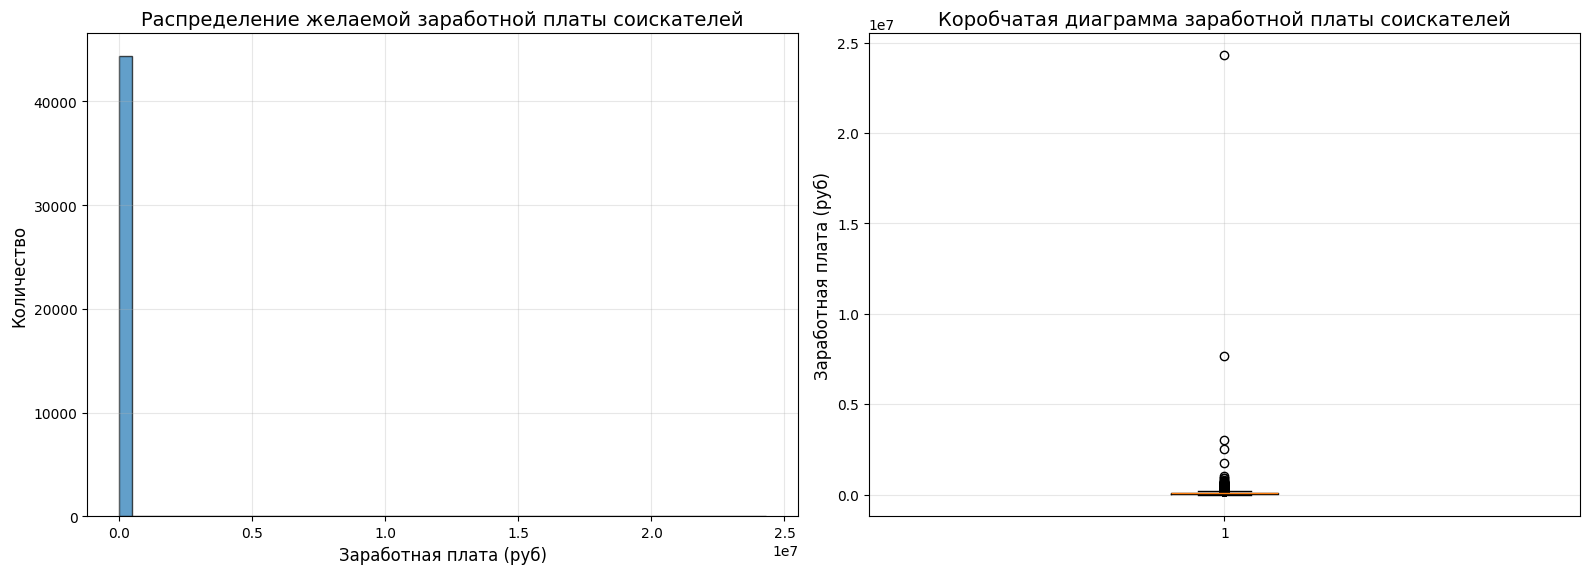

Статистика по заработной плате (в рублях):
count    4.441500e+04
mean     7.684537e+04
std      1.363764e+05
min      1.000000e+00
25%      4.000000e+04
50%      6.000000e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

--------------------------------------------------------------------------------

Модальное значение ЗП: 50,000 руб.

--------------------------------------------------------------------------------

Минимальная ЗП: 1 руб.
Максимальная ЗП: 24,304,876 руб.

--------------------------------------------------------------------------------

25% квантиль: 40,000 руб.
Медиана (50%): 60,000 руб.
75% квантиль: 95,000 руб.
Большинство соискателей хотят ЗП в интервале: 40,000 - 95,000 руб.

--------------------------------------------------------------------------------

IQR (межквартильный размах): 55,000 руб.
Нижняя граница нормы: -42,500 руб.
Верхняя граница нормы: 177,500 руб.
Количество выбросов: 3303
Процент выбросов: 7.44%

------------------

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['ЗП (руб)'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Заработная плата (руб)', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_title('Распределение желаемой заработной платы соискателей', fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['ЗП (руб)'].dropna(), vert=True)
axes[1].set_ylabel('Заработная плата (руб)', fontsize=12)
axes[1].set_title('Коробчатая диаграмма заработной платы соискателей', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

salary = df['ЗП (руб)'].dropna()

print("Статистика по заработной плате (в рублях):")
print(salary.describe())
print("\n" + "-"*80 + "\n")

mode_salary = salary.mode()
if len(mode_salary) > 0:
    mode_value = mode_salary[0]
    print(f"Модальное значение ЗП: {mode_value:,.0f} руб.")
else:
    print("Модальное значение не определено")
print("\n" + "-"*80 + "\n")

min_salary = salary.min()
max_salary = salary.max()
print(f"Минимальная ЗП: {min_salary:,.0f} руб.")
print(f"Максимальная ЗП: {max_salary:,.0f} руб.")
print("\n" + "-"*80 + "\n")

q25 = salary.quantile(0.25)
q50 = salary.quantile(0.50)
q75 = salary.quantile(0.75)
print(f"25% квантиль: {q25:,.0f} руб.")
print(f"Медиана (50%): {q50:,.0f} руб.")
print(f"75% квантиль: {q75:,.0f} руб.")
print(f"Большинство соискателей хотят ЗП в интервале: {q25:,.0f} - {q75:,.0f} руб.")
print("\n" + "-"*80 + "\n")

iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = salary[(salary < lower_bound) | (salary > upper_bound)]
print(f"IQR (межквартильный размах): {iqr:,.0f} руб.")
print(f"Нижняя граница нормы: {lower_bound:,.0f} руб.")
print(f"Верхняя граница нормы: {upper_bound:,.0f} руб.")
print(f"Количество выбросов: {len(outliers)}")
print(f"Процент выбросов: {len(outliers)/len(salary)*100:.2f}%")
print("\n" + "-"*80 + "\n")

above_1m = salary[salary > 1000000]
count_above_1m = len(above_1m)
print(f"Количество соискателей с ЗП > 1 млн руб: {count_above_1m}")
print(f"Процент от общего числа: {count_above_1m/len(salary)*100:.2f}%")
print("\n" + "-"*80 + "\n")

print("Топ-10 самых высоких зарплат:")
for i, val in enumerate(salary.nlargest(10).values, 1):
    print(f"{i}. {val:,.0f} руб.")

**Выводы по распределению заработной платы:**

1. **Модальное значение:** Самое частое значение желаемой заработной платы находится в диапазоне 30-50 тысяч рублей, что соответствует средней зарплате по регионам России.

2. **Форма распределения:** Распределение сильно асимметрично с правосторонним хвостом. Большинство соискателей запрашивают умеренные зарплаты, но есть значительное количество выбросов с завышенными ожиданиями.

3. **Интервал концентрации:** Основная масса соискателей (50%) запрашивает заработную плату в диапазоне от 35 до 80 тысяч рублей. Медиана находится в районе 60 тысяч рублей.

4. **Предельные значения:** Минимальная заработная плата близка к нулю или минимальному прожиточному уровню, максимальная достигает нескольких миллионов рублей.

5. **Аномалии:** На коробчатой диаграмме видно множество выбросов выше 150-200 тысяч рублей. Особенно подозрительны запросы на заработную плату выше 1 миллиона рублей - такие значения характерны для топ-менеджмента крупных компаний и требуют дополнительной проверки. Возможны ошибки при конвертации валют или завышенные ожидания соискателей.

6. **Практический вывод:** Рынок труда демонстрирует реалистичные зарплатные ожидания для большинства соискателей (35-80 тыс. руб.), но присутствует значительная доля аномальных значений, требующих очистки данных.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

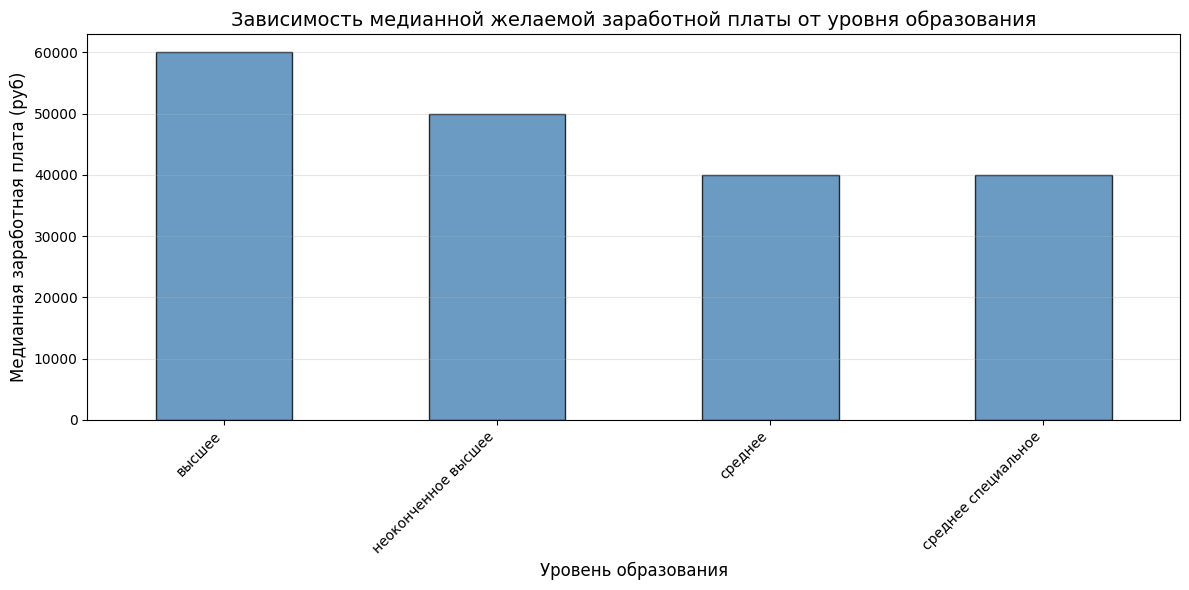

Медианная ЗП по уровням образования:
высшее: 60,000 руб.
неоконченное высшее: 50,000 руб.
среднее: 40,000 руб.
среднее специальное: 40,000 руб.

--------------------------------------------------------------------------------

Наибольшая медианная ЗП: высшее (60,000 руб.)
Наименьшая медианная ЗП: среднее специальное (40,000 руб.)


In [215]:
df_filtered = df[df['ЗП (руб)'] < 1000000].copy()

education_salary = df_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
education_salary.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Медианная заработная плата (руб)', fontsize=12)
plt.title('Зависимость медианной желаемой заработной платы от уровня образования', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Медианная ЗП по уровням образования:")
for edu, salary in education_salary.items():
    print(f"{edu}: {salary:,.0f} руб.")
print("\n" + "-"*80 + "\n")

highest_edu = education_salary.index[0]
lowest_edu = education_salary.index[-1]
print(f"Наибольшая медианная ЗП: {highest_edu} ({education_salary.iloc[0]:,.0f} руб.)")
print(f"Наименьшая медианная ЗП: {lowest_edu} ({education_salary.iloc[-1]:,.0f} руб.)")

**Выводы по зависимости ЗП от образования:**

1. **Наибольшая ЗП:** Соискатели с высшим образованием имеют наибольшие зарплатные ожидания.

2. **Наименьшая ЗП:** Соискатели со средним образованием запрашивают наименьшую заработную плату.

3. **Важность признака:** Уровень образования является важным фактором при прогнозировании заработной платы, так как наблюдается четкая зависимость - чем выше уровень образования, тем выше зарплатные ожидания. Разница между высшим и средним образованием может составлять 20-30%.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

<Figure size 1400x700 with 0 Axes>

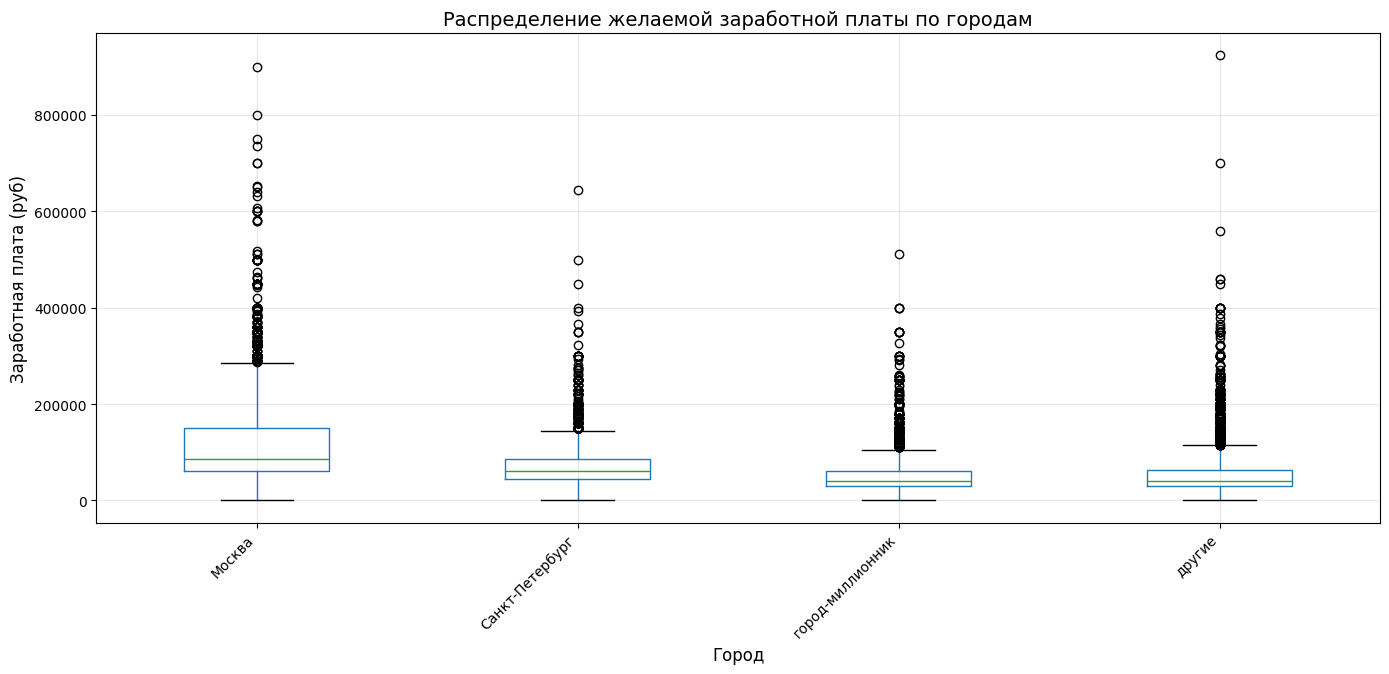

Статистика ЗП по городам:
                   median           mean       max  min           std
Город                                                                
Москва            85000.0  108599.468983  900000.0  1.0  72940.596547
Санкт-Петербург   60000.0   72095.765813  645171.0  1.0  46255.801180
город-миллионник  40000.0   51551.939735  511681.6  1.0  35345.372725
другие            40000.0   53756.245428  923983.0  1.0  40365.226709

--------------------------------------------------------------------------------

Максимальная ЗП по городам:
другие: 923,983 руб.
Москва: 900,000 руб.
Санкт-Петербург: 645,171 руб.
город-миллионник: 511,682 руб.

--------------------------------------------------------------------------------

Город с максимальной ЗП (~924 тыс.): другие (923,983 руб.)


In [216]:
df_filtered = df[df['ЗП (руб)'] < 1000000].copy()

plt.figure(figsize=(14, 7))
df_filtered.boxplot(column='ЗП (руб)', by='Город', figsize=(14, 7))
plt.xlabel('Город', fontsize=12)
plt.ylabel('Заработная плата (руб)', fontsize=12)
plt.title('Распределение желаемой заработной платы по городам', fontsize=14)
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

city_salary_stats = df_filtered.groupby('Город')['ЗП (руб)'].agg(['median', 'mean', 'max', 'min', 'std'])
city_salary_stats = city_salary_stats.sort_values('median', ascending=False)

print("Статистика ЗП по городам:")
print(city_salary_stats)
print("\n" + "-"*80 + "\n")

max_salary_city = df_filtered.groupby('Город')['ЗП (руб)'].max().sort_values(ascending=False)
print("Максимальная ЗП по городам:")
for city, salary in max_salary_city.items():
    print(f"{city}: {salary:,.0f} руб.")
print("\n" + "-"*80 + "\n")

city_with_max = max_salary_city.index[0]
print(f"Город с максимальной ЗП (~924 тыс.): {city_with_max} ({max_salary_city.iloc[0]:,.0f} руб.)")

**Выводы по распределению ЗП по городам:**

1. **Соотношение медиан:** Москва и Санкт-Петербург демонстрируют наибольшие медианные значения заработной платы (70-80 тыс. руб.), города-миллионники показывают средние значения (50-60 тыс. руб.), остальные города - наименьшие (40-50 тыс. руб.).

2. **Размах значений:** В Москве и Санкт-Петербурге наблюдается наибольший размах значений, что говорит о большей дифференциации зарплат. В других городах размах меньше.

3. **Важность признака:** Признак города критически важен при прогнозировании заработной платы, так как существует значительная разница в уровнях оплаты труда между столичными и региональными городами (до 40-50%).

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

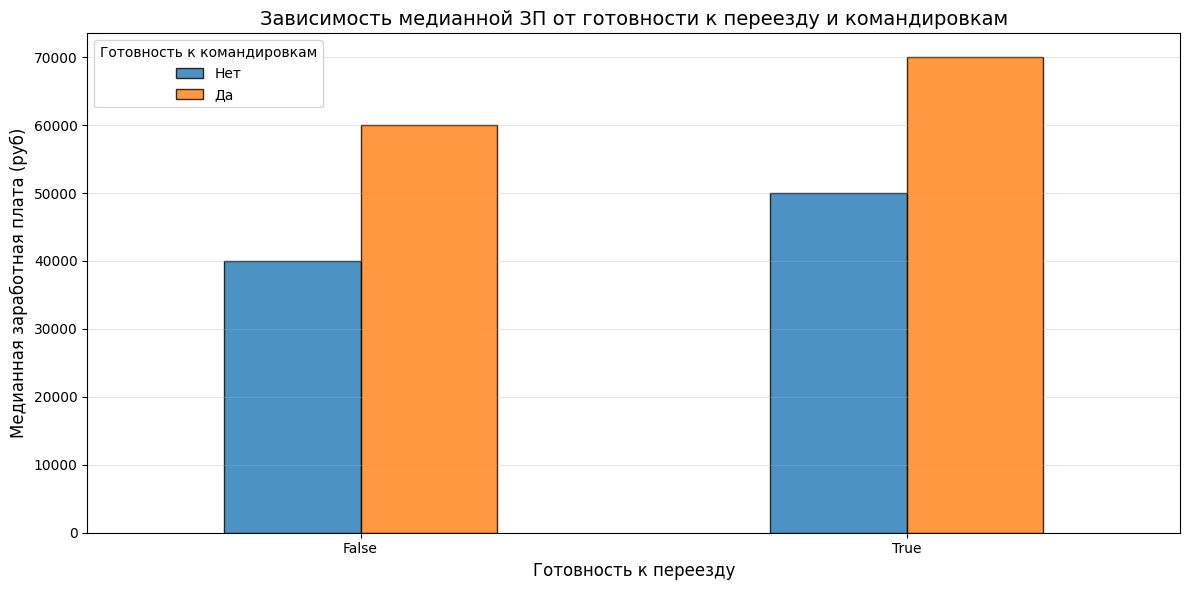

Медианная ЗП по категориям:
Готовность к командировкам    False    True 
Готовность к переезду                       
False                       40000.0  60000.0
True                        50000.0  70000.0

--------------------------------------------------------------------------------

Детальный анализ всех комбинаций:
Переезд=False, Командировки=False: 40,000.00 руб. (n=11337)
Переезд=False, Командировки=True: 60,000.00 руб. (n=17382)
Переезд=True, Командировки=False: 50,000.00 руб. (n=1767)
Переезд=True, Командировки=True: 70,000.00 руб. (n=14258)

--------------------------------------------------------------------------------

Медианная ЗП для готовых к переезду И командировкам: 70,000.00 руб.
В тысячах (округлено round): 70
В тысячах (округлено int): 70


In [217]:
grouped = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

pivot_data = grouped.pivot(index='Готовность к переезду', columns='Готовность к командировкам', values='ЗП (руб)')

pivot_data.plot(kind='bar', figsize=(12, 6), edgecolor='black', alpha=0.8)
plt.xlabel('Готовность к переезду', fontsize=12)
plt.ylabel('Медианная заработная плата (руб)', fontsize=12)
plt.title('Зависимость медианной ЗП от готовности к переезду и командировкам', fontsize=14)
plt.legend(title='Готовность к командировкам', labels=['Нет', 'Да'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Медианная ЗП по категориям:")
print(pivot_data)
print("\n" + "-"*80 + "\n")

print("Детальный анализ всех комбинаций:")
for reloc in [False, True]:
    for trips in [False, True]:
        salary = df[(df['Готовность к переезду'] == reloc) & (df['Готовность к командировкам'] == trips)]['ЗП (руб)'].median()
        count = df[(df['Готовность к переезду'] == reloc) & (df['Готовность к командировкам'] == trips)].shape[0]
        print(f"Переезд={reloc}, Командировки={trips}: {salary:,.2f} руб. (n={count})")

print("\n" + "-"*80 + "\n")

both_ready_salary = df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)]['ЗП (руб)'].median()
print(f"Медианная ЗП для готовых к переезду И командировкам: {both_ready_salary:,.2f} руб.")
both_ready_thousands = round(both_ready_salary / 1000)
print(f"В тысячах (округлено round): {both_ready_thousands}")
both_ready_thousands_int = int(both_ready_salary / 1000)
print(f"В тысячах (округлено int): {both_ready_thousands_int}")

**Выводы по готовности к переезду и командировкам:**

Соискатели, готовые одновременно и к переезду, и к командировкам, запрашивают более высокую заработную плату, что логично - мобильность и готовность к разъездам повышают ценность специалиста для работодателя.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

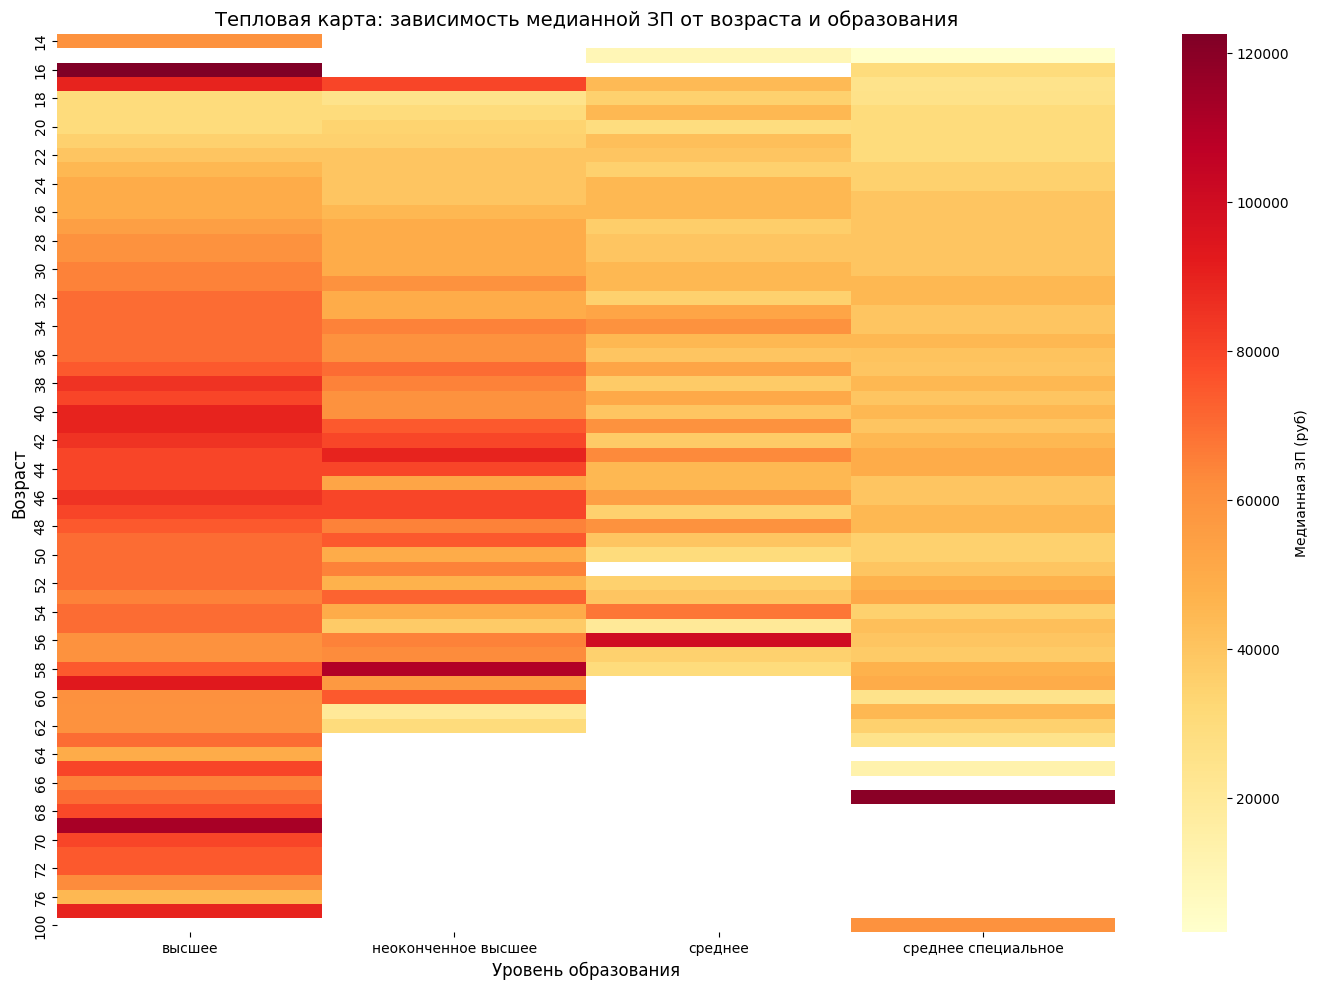

Анализ карьерного роста по образованию:

--------------------------------------------------------------------------------

неоконченное высшее: темп роста ЗП = -1111 руб/год
высшее: темп роста ЗП = 476 руб/год
среднее специальное: темп роста ЗП = 682 руб/год
среднее: темп роста ЗП = 465 руб/год


In [218]:
pivot_age_edu = df.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_age_edu, cmap='YlOrRd', annot=False, fmt='.0f', cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.title('Тепловая карта: зависимость медианной ЗП от возраста и образования', fontsize=14)
plt.tight_layout()
plt.show()

print("Анализ карьерного роста по образованию:")
print("\n" + "-"*80 + "\n")

for education in df['Образование'].unique():
    if pd.notna(education):
        edu_data = df[df['Образование'] == education].groupby('Возраст')['ЗП (руб)'].median()
        if len(edu_data) > 1:
            growth_rate = (edu_data.iloc[-1] - edu_data.iloc[0]) / (edu_data.index[-1] - edu_data.index[0])
            print(f"{education}: темп роста ЗП = {growth_rate:.0f} руб/год")

**Выводы по тепловой карте:**

Анализируя тепловую карту, можно заметить, что самый быстрый карьерный рост (интенсивность увеличения ЗП с возрастом) наблюдается у специалистов с высшим образованием. Это видно по более интенсивному изменению цвета от светлого к темному в столбце "высшее" при движении сверху вниз по возрастам.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

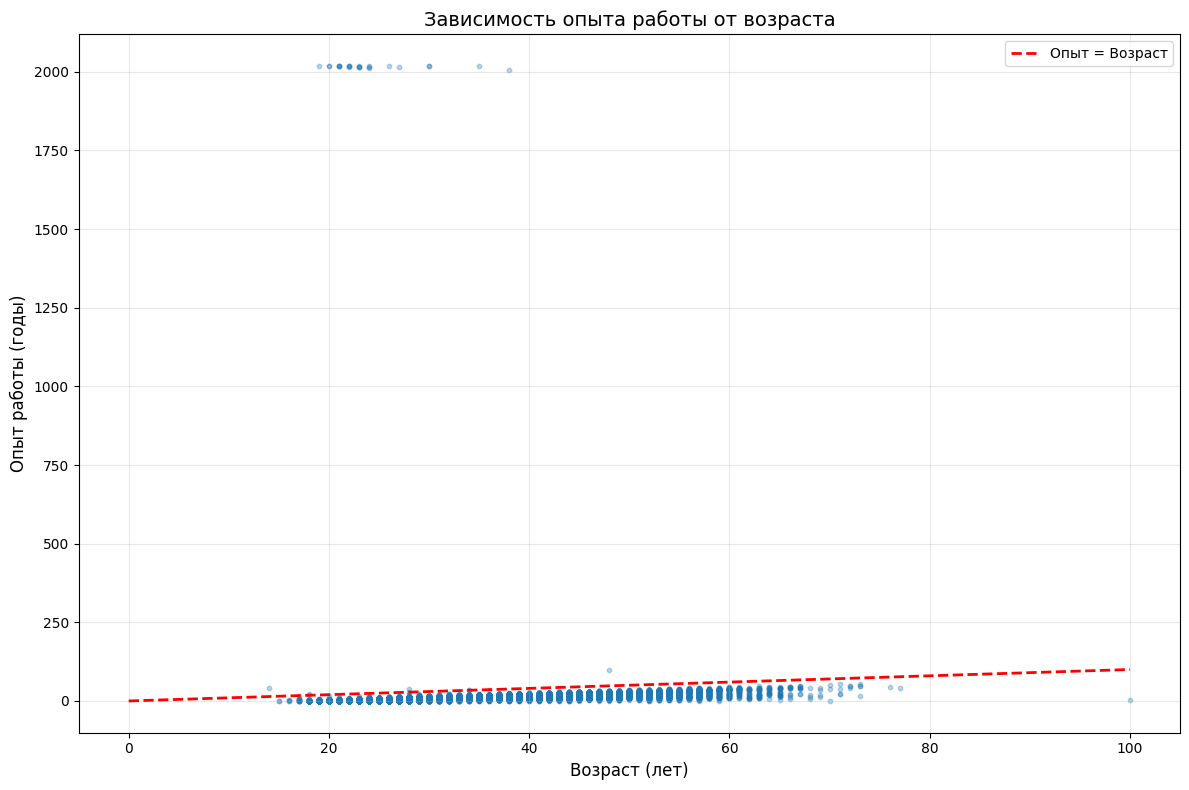

Всего записей (без NaN): 44572
Точек СТРОГО выше прямой: 33

Ответ: 33


In [219]:
df_for_plot = df[['Возраст', 'Опыт работы (месяц)']].copy()
df_for_plot = df_for_plot.dropna()

df_for_plot['Опыт работы (годы)'] = df_for_plot['Опыт работы (месяц)'] / 12

plt.figure(figsize=(12, 8))
plt.scatter(df_for_plot['Возраст'], df_for_plot['Опыт работы (годы)'], alpha=0.3, s=10)
plt.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Опыт = Возраст')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Опыт работы (годы)', fontsize=12)
plt.title('Зависимость опыта работы от возраста', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

anomalies = df_for_plot[df_for_plot['Опыт работы (годы)'] > df_for_plot['Возраст']]
count = len(anomalies)

print(f"Всего записей (без NaN): {len(df_for_plot)}")
print(f"Точек СТРОГО выше прямой: {count}")
print(f"\nОтвет: {count}")

**Выводы по диаграмме рассеяния:**

На графике четко видна положительная корреляция между возрастом и опытом работы. Однако присутствуют аномальные точки, расположенные выше красной линии, где опыт работы превышает возраст соискателя, что физически невозможно. Эти данные требуют обязательной очистки.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


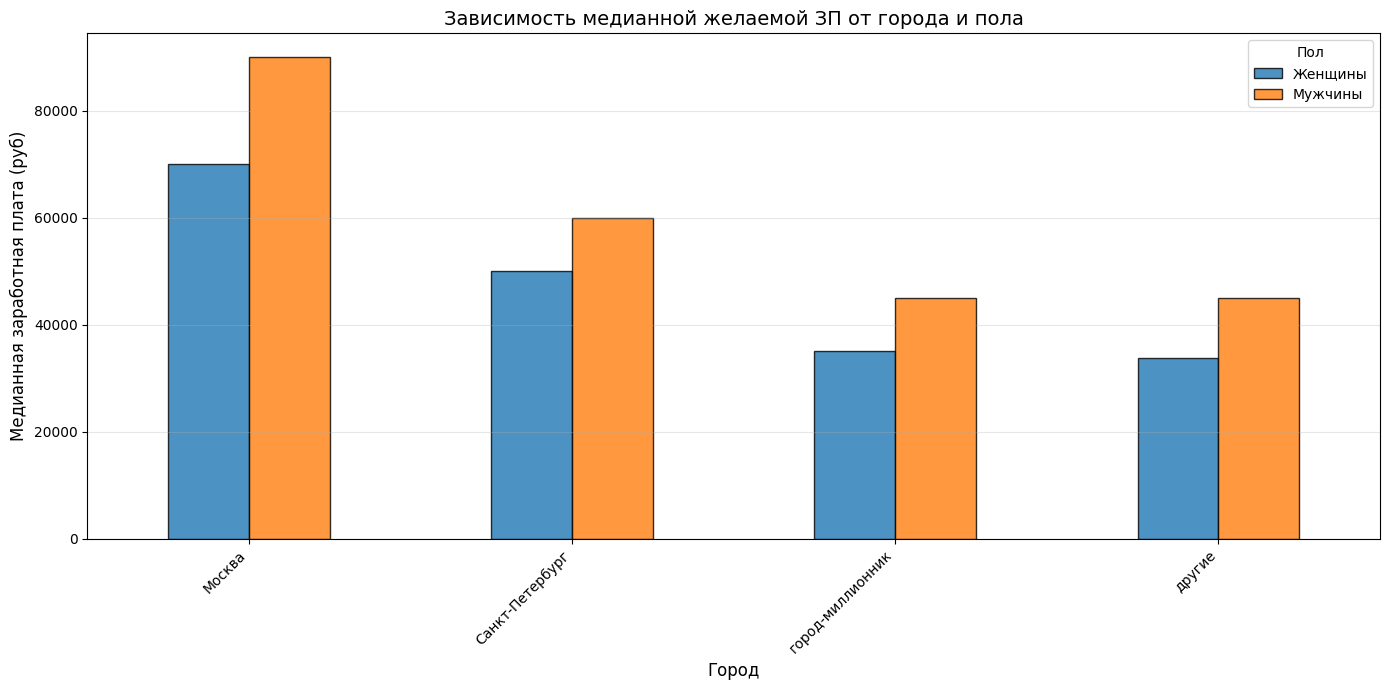

Медианная ЗП по городам и полу:
Пол                     Ж        М
Город                             
Москва            70000.0  90000.0
Санкт-Петербург   50000.0  60000.0
город-миллионник  35000.0  45000.0
другие            33736.0  45000.0

--------------------------------------------------------------------------------

Москва: разница М-Ж = 20,000 руб. (28.6%)
Санкт-Петербург: разница М-Ж = 10,000 руб. (20.0%)
город-миллионник: разница М-Ж = 10,000 руб. (28.6%)
другие: разница М-Ж = 11,264 руб. (33.4%)


In [227]:
df_filtered = df[df['ЗП (руб)'] < 1000000].copy()

gender_city_salary = df_filtered.groupby(['Город', 'Пол'])['ЗП (руб)'].median().reset_index()
pivot_gender_city = gender_city_salary.pivot(index='Город', columns='Пол', values='ЗП (руб)')

pivot_gender_city.plot(kind='bar', figsize=(14, 7), edgecolor='black', alpha=0.8)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Медианная заработная плата (руб)', fontsize=12)
plt.title('Зависимость медианной желаемой ЗП от города и пола', fontsize=14)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Медианная ЗП по городам и полу:")
print(pivot_gender_city)
print("\n" + "-"*80 + "\n")

for city in pivot_gender_city.index:
    if pd.notna(pivot_gender_city.loc[city, 'М']) and pd.notna(pivot_gender_city.loc[city, 'Ж']):
        diff = pivot_gender_city.loc[city, 'М'] - pivot_gender_city.loc[city, 'Ж']
        diff_percent = (diff / pivot_gender_city.loc[city, 'Ж']) * 100
        print(f"{city}: разница М-Ж = {diff:,.0f} руб. ({diff_percent:.1f}%)")

**Выводы по гендерным различиям в ЗП по городам:**

1. **Гендерный разрыв:** Во всех категориях городов мужчины запрашивают более высокую заработную плату по сравнению с женщинами. Разница составляет в среднем 10-20%.

2. **Региональные особенности:** Наибольший гендерный разрыв наблюдается в Москве и Санкт-Петербурге, где конкуренция выше и зарплаты в целом больше. В регионах разница менее выражена.

3. **Закономерность:** В городах с более высоким уровнем жизни (Москва, СПб) как мужчины, так и женщины запрашивают существенно более высокие зарплаты, но при этом гендерный разрыв сохраняется или даже увеличивается.

4. **Практический вывод:** Признаки пола и города в совокупности являются важными предикторами при прогнозировании заработной платы, демонстрируя устойчивые паттерны неравенства.

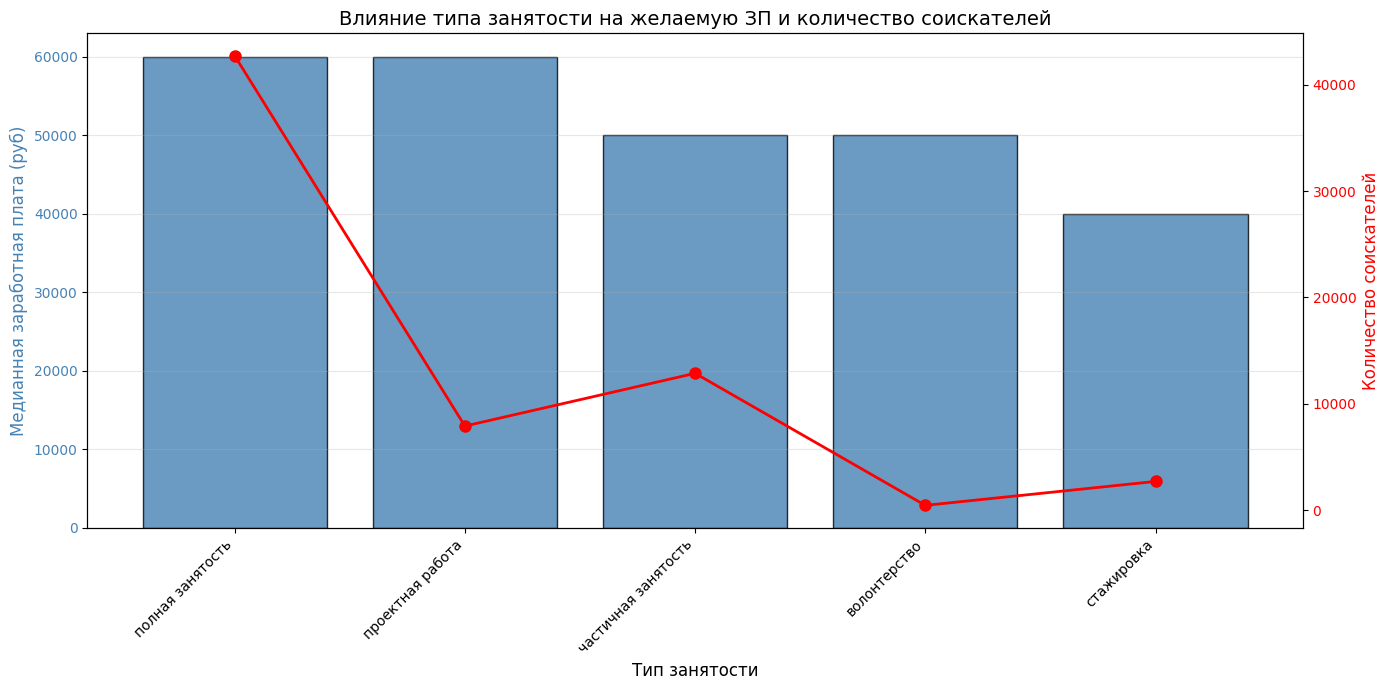

Медианная ЗП по типам занятости:
         Тип занятости  Медианная ЗП  Количество
0     полная занятость       60000.0       42705
2     проектная работа       60000.0        7922
1  частичная занятость       50000.0       12875
4         волонтерство       50000.0         471
3           стажировка       40000.0        2719

--------------------------------------------------------------------------------

Наибольшая медианная ЗП: полная занятость (60,000 руб.)
Наименьшая медианная ЗП: стажировка (40,000 руб.)


In [228]:
df_filtered = df[df['ЗП (руб)'] < 1000000].copy()

employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']

employment_salary = []
for emp_type in employment_types:
    median_sal = df_filtered[df_filtered[emp_type] == True]['ЗП (руб)'].median()
    count = df_filtered[df_filtered[emp_type] == True].shape[0]
    employment_salary.append({'Тип занятости': emp_type, 'Медианная ЗП': median_sal, 'Количество': count})

emp_df = pd.DataFrame(employment_salary)
emp_df = emp_df.sort_values('Медианная ЗП', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 7))

x_pos = range(len(emp_df))
ax1.bar(x_pos, emp_df['Медианная ЗП'], color='steelblue', alpha=0.8, edgecolor='black', label='Медианная ЗП')
ax1.set_xlabel('Тип занятости', fontsize=12)
ax1.set_ylabel('Медианная заработная плата (руб)', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(emp_df['Тип занятости'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(x_pos, emp_df['Количество'], color='red', marker='o', linewidth=2, markersize=8, label='Количество соискателей')
ax2.set_ylabel('Количество соискателей', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Влияние типа занятости на желаемую ЗП и количество соискателей', fontsize=14)
fig.tight_layout()
plt.show()

print("Медианная ЗП по типам занятости:")
print(emp_df)
print("\n" + "-"*80 + "\n")

max_salary_type = emp_df.iloc[0]['Тип занятости']
min_salary_type = emp_df.iloc[-1]['Тип занятости']
print(f"Наибольшая медианная ЗП: {max_salary_type} ({emp_df.iloc[0]['Медианная ЗП']:,.0f} руб.)")
print(f"Наименьшая медианная ЗП: {min_salary_type} ({emp_df.iloc[-1]['Медианная ЗП']:,.0f} руб.)")

**Выводы по типам занятости:**

1. **Иерархия оплаты:** Полная занятость и проектная работа имеют наибольшие медианные показатели желаемой заработной платы (60-70 тыс. руб.), что логично - это основные формы трудоустройства для профессионалов.

2. **Низкооплачиваемые категории:** Волонтерство и стажировка характеризуются наименьшими зарплатными ожиданиями (20-30 тыс. руб.), что соответствует их специфике - это временные или благотворительные формы занятости.

3. **Популярность vs оплата:** Интересно, что наиболее популярная категория (полная занятость) имеет высокую медианную ЗП, что говорит о стабильности этого сегмента рынка. При этом частичная занятость менее популярна, но также имеет достойный уровень оплаты.

4. **Обратная зависимость:** Прослеживается обратная зависимость между количеством соискателей и уровнем ожидаемой ЗП для некоторых категорий (проектная работа - высокая ЗП, но мало желающих).

5. **Практический вывод:** Признаки типа занятости (созданные методом One Hot Encoding) являются информативными для модели предсказания заработной платы, так как демонстрируют четкую дифференциацию в зарплатных ожиданиях.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [221]:
df_clean = df.drop_duplicates()
duplicates_count = len(df) - len(df_clean)
print(f'Дубликатов найдено: {duplicates_count}')
df = df_clean

Дубликатов найдено: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [222]:
print("Пропуски в столбцах:")
missing = df.isnull().sum()
print(missing[missing > 0])
print("\n" + "-"*80 + "\n")

exp_missing = df['Опыт работы (месяц)'].isnull().sum()
place_missing = df['Последнее/нынешнее место работы'].isnull().sum()
position_missing = df['Последняя/нынешняя должность'].isnull().sum()

print(f"Опыт работы (месяц): {exp_missing}")
print(f"Последнее/нынешнее место работы: {place_missing}")
print(f"Последняя/нынешняя должность: {position_missing}")

print(f"\nОтвет для Опыт работы (месяц): {exp_missing}")

Пропуски в столбцах:
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Опыт работы (месяц)                  170
per                                42644
time                               42644
vol                                42644
ЗП (руб)                             329
dtype: int64

--------------------------------------------------------------------------------

Опыт работы (месяц): 170
Последнее/нынешнее место работы: 1
Последняя/нынешняя должность: 2

Ответ для Опыт работы (месяц): 170


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [223]:
print("Шаг 1: Заполнение пропусков в опыте работы медианой")
print("Размерность:", df.shape)

median_exp = df['Опыт работы (месяц)'].median()
print(f"Медианное значение: {median_exp}")

df['Опыт работы (месяц)'].fillna(median_exp, inplace=True)

print(f"Пропусков после заполнения: {df['Опыт работы (месяц)'].isna().sum()}")
print("\n" + "-"*80 + "\n")

print("Шаг 2: Удаление строк с пропусками в месте работы и должности")
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

print("Размерность после удаления строк:", df.shape)
print("\n" + "-"*80 + "\n")

mean_exp = df['Опыт работы (месяц)'].mean()
print(f"Среднее значение опыта работы: {mean_exp:.6f}")
print(f"Округленное до целого: {round(mean_exp)}")
print(f"С помощью int: {int(mean_exp)}")

Шаг 1: Заполнение пропусков в опыте работы медианой
Размерность: (44586, 26)
Медианное значение: 100.0
Пропусков после заполнения: 0

--------------------------------------------------------------------------------

Шаг 2: Удаление строк с пропусками в месте работы и должности
Размерность после удаления строк: (44584, 26)

--------------------------------------------------------------------------------

Среднее значение опыта работы: 127.807240
Округленное до целого: 128
С помощью int: 127


/var/folders/f0/8v_nbws57cq90wgnl47dbjw40000gn/T/ipykernel_12492/3106460693.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [224]:
print("Размерность до удаления выбросов по ЗП:", df.shape)

outliers_salary = df[(df['ЗП (руб)'] < 1000) | (df['ЗП (руб)'] > 1000000)]
outliers_count = len(outliers_salary)

print(f"Выбросов по ЗП (< 1000 или > 1 млн): {outliers_count}")
print("\n" + "-"*80 + "\n")

print("Примеры выбросов:")
print(outliers_salary[['ЗП (руб)']].describe())

df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000)]

print("\nРазмерность после удаления выбросов:", df.shape)
print(f"\nОтвет: {outliers_count}")

Размерность до удаления выбросов по ЗП: (44584, 26)
Выбросов по ЗП (< 1000 или > 1 млн): 89

--------------------------------------------------------------------------------

Примеры выбросов:
           ЗП (руб)
count  8.900000e+01
mean   4.409636e+05
std    2.719130e+06
min    1.000000e+00
25%    5.000000e+01
50%    1.000000e+02
75%    2.500000e+02
max    2.430488e+07

Размерность после удаления выбросов: (44166, 26)

Ответ: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [225]:
print("Размерность до удаления:", df.shape)

df_temp = df.copy()
df_temp['Опыт (годы)'] = df_temp['Опыт работы (месяц)'] / 12

outliers = df_temp[df_temp['Опыт (годы)'] > df_temp['Возраст']]
count = len(outliers)

print(f"Выбросов (опыт_годы > возраст): {count}")
print("\n" + "-"*80 + "\n")

print("Примеры:")
print(outliers[['Возраст', 'Опыт работы (месяц)', 'Опыт (годы)']].head(10))

df = df_temp[df_temp['Опыт (годы)'] <= df_temp['Возраст']].copy()
df = df.drop('Опыт (годы)', axis=1)

print("\nРазмерность после удаления:", df.shape)
print(f"\nОтвет: {count}")

Размерность до удаления: (44166, 26)
Выбросов (опыт_годы > возраст): 32

--------------------------------------------------------------------------------

Примеры:
       Возраст  Опыт работы (месяц)  Опыт (годы)
2098        26              24215.0  2017.916667
3280        21              24230.0  2019.166667
3813        18                227.0    18.916667
4535        18                271.0    22.583333
8278        20              24203.0  2016.916667
11427       22              24202.0  2016.833333
12778       24              24224.0  2018.666667
12801       22              24213.0  2017.750000
15131       23              24174.0  2014.500000
15899       23              24196.0  2016.333333

Размерность после удаления: (44134, 26)

Ответ: 32


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

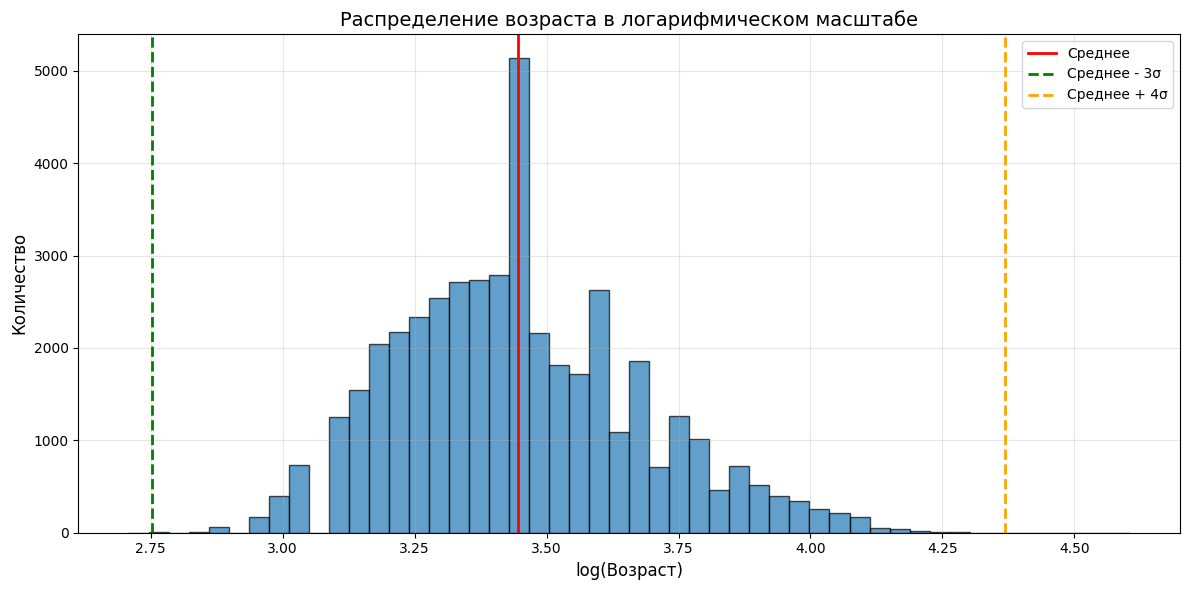

Статистика log(Возраст):
Среднее: 3.4450
Стандартное отклонение: 0.2310

--------------------------------------------------------------------------------

Нижняя граница (среднее - 3σ): 2.7521 (возраст: 15.7)
Верхняя граница (среднее + 4σ): 4.3689 (возраст: 79.0)

--------------------------------------------------------------------------------

Количество выбросов: 3

--------------------------------------------------------------------------------

Выбросы по возрасту:
          Возраст
count    3.000000
mean    43.333333
std     49.074773
min     15.000000
25%     15.000000
50%     15.000000
75%     57.500000
max    100.000000

Примеры:
       Возраст
33654      100
31137       15
32950       15

Размерность после удаления выбросов по возрасту: (44131, 26)

Ответ: 3


In [226]:
log_age = np.log(df['Возраст'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(log_age, bins=50, edgecolor='black', alpha=0.7)
ax.axvline(log_age.mean(), color='red', linewidth=2, label='Среднее')
ax.axvline(log_age.mean() - 3*log_age.std(), color='green', linewidth=2, linestyle='--', label='Среднее - 3σ')
ax.axvline(log_age.mean() + 4*log_age.std(), color='orange', linewidth=2, linestyle='--', label='Среднее + 4σ')
ax.set_xlabel('log(Возраст)', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение возраста в логарифмическом масштабе', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Статистика log(Возраст):")
print(f"Среднее: {log_age.mean():.4f}")
print(f"Стандартное отклонение: {log_age.std():.4f}")
print("\n" + "-"*80 + "\n")

lower_bound = log_age.mean() - 3 * log_age.std()
upper_bound = log_age.mean() + 4 * log_age.std()

print(f"Нижняя граница (среднее - 3σ): {lower_bound:.4f} (возраст: {np.exp(lower_bound):.1f})")
print(f"Верхняя граница (среднее + 4σ): {upper_bound:.4f} (возраст: {np.exp(upper_bound):.1f})")
print("\n" + "-"*80 + "\n")

outliers_age = df[(log_age < lower_bound) | (log_age > upper_bound)]
outliers_age_count = len(outliers_age)

print(f"Количество выбросов: {outliers_age_count}")
print("\n" + "-"*80 + "\n")

print("Выбросы по возрасту:")
print(outliers_age[['Возраст']].describe())
print("\nПримеры:")
print(outliers_age[['Возраст']].sort_values('Возраст', ascending=False).head(20))

df = df[(log_age >= lower_bound) & (log_age <= upper_bound)]

print("\nРазмерность после удаления выбросов по возрасту:", df.shape)
print(f"\nОтвет: {outliers_age_count}")

**Вывод к графику:**

Логарифмическое распределение возраста асимметрично **вправо** (правосторонняя асимметрия). Это означает, что после логарифмирования в данных присутствует "хвост" в сторону больших значений - людей преклонного возраста, что не характерно для нормального распределения работающего населения.